In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()


In [ ]:
#!kaggle competitions download -c emotion-detection-from-facial-expressions

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ahmedmoorsy/facial-expression

 96% 185M/193M [00:04<00:00, 71.3MB/s]
100% 193M/193M [00:04<00:00, 49.7MB/s]


In [ ]:
! unzip /content/facial-expression.zip -d /content/dataset/

Archive:  /content/facial-expression.zip
  inflating: /content/dataset/fer2013.csv  
  inflating: /content/dataset/fer2013/fer2013.csv  


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
imgdata = pd.read_csv('dataset/fer2013.csv')

In [ ]:
emotion = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [ ]:
pixels = list(map(int, imgdata["pixels"][2].split()))
img = np.array(pixels).reshape((48, 48)).astype('uint8')

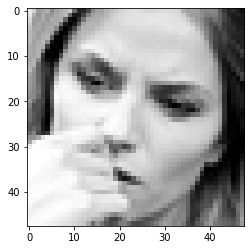

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
data_df = pd.DataFrame()

In [ ]:
def getImgArray(s):
  pixels = list(map(int, s.split()))
  return pixels # (np.array(pixels)/255).reshape((48, 48)).astype('uint8')

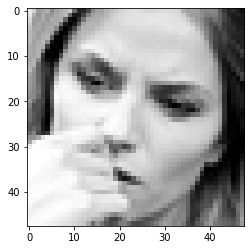

In [ ]:
tempimg = np.array(getImgArray(imgdata["pixels"][2]))
plt.imshow(tempimg.reshape((48,-1)), cmap="gray")

In [ ]:
np.array(imgdata['pixels'])

array(['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 5

In [ ]:
pix = imgdata['pixels']
np.array([list(map(int, pix[0].split())), list(map(int, pix[0].split()))]).dtype

dtype('int64')

In [ ]:
data_df['image'] = imgdata.apply(lambda row : np.array(getImgArray(row['pixels'])), axis = 1)

In [ ]:
len(data_df['image'][0])

2304

In [ ]:
X = []
for i in range(len(data_df['image'])):
  X.append(np.array(data_df['image'][i])) #.reshape(48,48,1))

In [ ]:
data_df['emotion'] = imgdata['emotion']

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    35887 non-null  object
 1   emotion  35887 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
y = np.array(data_df['emotion'])

###new data


In [ ]:
!kaggle datasets download -d coolstance7/harish-expr-data

 74% 9.00M/12.2M [00:00<00:00, 33.8MB/s]
100% 12.2M/12.2M [00:00<00:00, 40.8MB/s]


In [ ]:
import pandas as pd
new_dataset = pd.read_pickle("./harish-expr-data.zip")

In [ ]:
new_images = new_dataset['image']

In [ ]:
X[0].shape

(2304,)

In [ ]:
new_images[0].flatten().shape

(2304,)

In [ ]:
for pic in new_images:
  X.append(pic.flatten())

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    35887 non-null  object
 1   emotion  35887 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
y = np.array(list(data_df['emotion'])+list(new_dataset['emotion']))

In [ ]:
y

array([0, 0, 2, ..., 6, 6, 6])

###continuation

In [ ]:
X_data = np.array(X)

In [ ]:
X_data.shape

(41805, 2304)

In [ ]:
len(X_data)S

41805

In [ ]:
#N, D = X_data.shape
N=len(X_data)
X_data = X_data.reshape(N, 48, 48, 1)

In [ ]:
X_data.shape

(41805, 48, 48, 1)

In [ ]:
X_norm = X_data/255

In [ ]:
np.array(data_df['image'][0])

array([ 70,  80,  82, ..., 106, 109,  82])

In [ ]:
X_norm[1:100]

In [ ]:
X_norm.shape

(41805, 48, 48, 1)

In [ ]:
X_norm[0].reshape(48,48)

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157, 0.16862745,
        0.16078431],
       [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294, 0.21960784,
        0.16862745],
       [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471, 0.2745098 ,
        0.18039216],
       [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627, 0.42745098,
        0.32156863]])

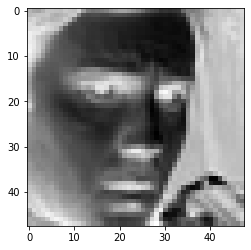

In [ ]:
plt.imshow(X_data[0].reshape(48,48) ,cmap=plt.cm.binary)
plt.show()

'tempimg = (data_df["image"][0])\nplt.imshow(tempimg, cmap="gray")'

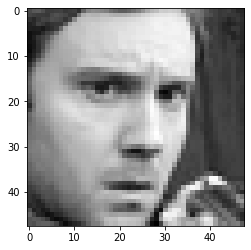

In [ ]:
tempimg = (X_norm[0])
plt.imshow(tempimg.reshape(48,48), cmap="gray")
"""tempimg = (data_df["image"][0])
plt.imshow(tempimg, cmap="gray")"""

In [ ]:
#data_df['emotion'] = imgdata['emotion']

In [ ]:
#data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    35887 non-null  object
 1   emotion  35887 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
def showImage(i):
  plt.figure()
  plt.imshow(X_norm[i].reshape(48,48), cmap="gray")
  plt.xlabel(emotion[y[i]])
  plt.show()
"""def showImage(i):
  plt.figure()
  plt.imshow(data_df['image'][i], cmap="gray")
  plt.xlabel(emotion[data_df['emotion'][i]])
  plt.show()"""

'def showImage(i):\n  plt.figure()\n  plt.imshow(data_df[\'image\'][i], cmap="gray")\n  plt.xlabel(emotion[data_df[\'emotion\'][i]])\n  plt.show()'

In [ ]:
for i in range(38000,38010):
  showImage(i)

In [ ]:
#y = np.array(data_df['emotion'])

In [ ]:
y

array([0, 0, 2, ..., 6, 6, 6])

In [ ]:
#from sklearn.model_selection import train_test_split
#
## Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X_norm[1:2000], data_df['emotion'][1:2000], test_size=0.3,random_state=109) # 70% training and 30% test
#

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_norm, y, test_size=0.1,
                                                random_state=42)

In [ ]:
import sklearn
sklearn.metrics.accuracy_score(ytest, yfit)

0.332

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
class_names = emotion

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = (Xtrain, ytrain), (Xtest, ytest)

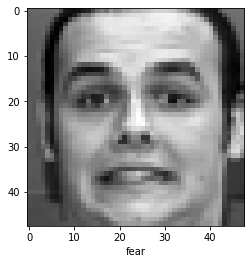

In [ ]:
# Let's look at a one image
IMG_INDEX = 12  # change this to look at other images

plt.imshow(train_images[IMG_INDEX].reshape(48,48) ,cmap='gray')
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

In [ ]:
np.max(train_labels)

6

#First NN architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
Total params: 125,952
Trainable params: 125,952
Non-trainable params: 0
________________________________________________

In [ ]:
"""model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))"""

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
train_images.shape

(26915, 48, 48, 1)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
421/421 [==============================] - 6s 13ms/step - loss: 1.6868 - accuracy: 0.3292 - val_loss: 1.5425 - val_accuracy: 0.4075
Epoch 2/20
421/421 [==============================] - 5s 12ms/step - loss: 1.4753 - accuracy: 0.4360 - val_loss: 1.4137 - val_accuracy: 0.4593
Epoch 3/20
421/421 [==============================] - 5s 12ms/step - loss: 1.3580 - accuracy: 0.4816 - val_loss: 1.3717 - val_accuracy: 0.4802
Epoch 4/20
421/421 [==============================] - 5s 12ms/step - loss: 1.2793 - accuracy: 0.5138 - val_loss: 1.2948 - val_accuracy: 0.5093
Epoch 5/20
421/421 [==============================] - 5s 12ms/step - loss: 1.2071 - accuracy: 0.5440 - val_loss: 1.2685 - val_accuracy: 0.5169
Epoch 6/20
421/421 [==============================] - 5s 12ms/step - loss: 1.1544 - accuracy: 0.5645 - val_loss: 1.2232 - val_accuracy: 0.5362
Epoch 7/20
421/421 [==============================] - 5s 12ms/step - loss: 1.0933 - accuracy: 0.5892 - val_loss: 1.2356 - val_accuracy: 0.5338

#Second NN architecture


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(7, activation="relu"))

In [ ]:
"""model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))"""

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 6, 128)         409728    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 2, 2, 256)         819456    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 1, 1, 256)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
421/421 [==============================] - 12s 29ms/step - loss: 1.7792 - accuracy: 0.2701 - val_loss: 1.6179 - val_accuracy: 0.3534
Epoch 2/20
421/421 [==============================] - 12s 28ms/step - loss: 1.4626 - accuracy: 0.4359 - val_loss: 1.3538 - val_accuracy: 0.4759
Epoch 3/20
421/421 [==============================] - 12s 28ms/step - loss: 1.3101 - accuracy: 0.5027 - val_loss: 1.2779 - val_accuracy: 0.5100
Epoch 4/20
421/421 [==============================] - 12s 28ms/step - loss: 1.2112 - accuracy: 0.5439 - val_loss: 1.2345 - val_accuracy: 0.5296
Epoch 5/20
421/421 [==============================] - 12s 28ms/step - loss: 1.1320 - accuracy: 0.5767 - val_loss: 1.1984 - val_accuracy: 0.5481
Epoch 6/20
421/421 [==============================] - 12s 28ms/step - loss: 1.0572 - accuracy: 0.6074 - val_loss: 1.2191 - val_accuracy: 0.5429
Epoch 7/20
421/421 [==============================] - 12s 28ms/step - loss: 0.9771 - accuracy: 0.6387 - val_loss: 1.2153 - val_accuracy:

In [ ]:
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

131/131 - 1s - loss: 2.0443 - accuracy: 0.6360
0.635972261428833


#Third NN architecture


In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(64, (5, 5), input_shape=(48, 48, 1),activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7))
model.add(layers.Activation('relu'))



"""model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(7, activation="softmax"))"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(test_images, test_labels))

Epoch 1/20
421/421 [==============================] - 24s 56ms/step - loss: 1.7932 - accuracy: 0.3572 - val_loss: 1.7538 - val_accuracy: 0.3978
Epoch 2/20
421/421 [==============================] - 23s 55ms/step - loss: 1.7174 - accuracy: 0.4376 - val_loss: 1.7245 - val_accuracy: 0.4331
Epoch 3/20
421/421 [==============================] - 23s 55ms/step - loss: 1.6710 - accuracy: 0.4896 - val_loss: 1.6739 - val_accuracy: 0.4862
Epoch 4/20
421/421 [==============================] - 23s 55ms/step - loss: 1.6337 - accuracy: 0.5289 - val_loss: 1.6942 - val_accuracy: 0.4651
Epoch 5/20
421/421 [==============================] - 23s 55ms/step - loss: 1.6033 - accuracy: 0.5605 - val_loss: 1.7197 - val_accuracy: 0.4364
Epoch 6/20
421/421 [==============================] - 23s 55ms/step - loss: 1.5705 - accuracy: 0.5942 - val_loss: 1.6265 - val_accuracy: 0.5320
Epoch 7/20
421/421 [==============================] - 23s 55ms/step - loss: 1.5423 - accuracy: 0.6236 - val_loss: 1.6162 - val_accuracy:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(test_images, test_labels))

Epoch 1/20
505/505 [==============================] - 17s 34ms/step - loss: 1.6891 - accuracy: 0.3583 - val_loss: 1.6004 - val_accuracy: 0.4018
Epoch 2/20
505/505 [==============================] - 17s 34ms/step - loss: 1.3387 - accuracy: 0.4959 - val_loss: 1.3638 - val_accuracy: 0.5010
Epoch 3/20
505/505 [==============================] - 17s 34ms/step - loss: 1.1671 - accuracy: 0.5652 - val_loss: 1.1536 - val_accuracy: 0.5684
Epoch 4/20
505/505 [==============================] - 17s 35ms/step - loss: 1.0373 - accuracy: 0.6164 - val_loss: 1.2005 - val_accuracy: 0.5503
Epoch 5/20
505/505 [==============================] - 18s 35ms/step - loss: 0.9125 - accuracy: 0.6650 - val_loss: 1.1501 - val_accuracy: 0.5795
Epoch 6/20
505/505 [==============================] - 18s 35ms/step - loss: 0.7610 - accuracy: 0.7251 - val_loss: 1.1531 - val_accuracy: 0.5843
Epoch 7/20
505/505 [==============================] - 18s 36ms/step - loss: 0.5898 - accuracy: 0.7902 - val_loss: 1.3452 - val_accuracy:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=64, 
            epochs=25, 
            verbose=1, 
            validation_data=(test_images, test_labels))

Epoch 1/25
588/588 [==============================] - 20s 35ms/step - loss: 1.7076 - accuracy: 0.3434 - val_loss: 1.7730 - val_accuracy: 0.3578
Epoch 2/25
588/588 [==============================] - 20s 34ms/step - loss: 1.3311 - accuracy: 0.5003 - val_loss: 1.1987 - val_accuracy: 0.5480
Epoch 3/25
588/588 [==============================] - 20s 35ms/step - loss: 1.1242 - accuracy: 0.5811 - val_loss: 1.1234 - val_accuracy: 0.5759
Epoch 4/25
588/588 [==============================] - 21s 35ms/step - loss: 0.9877 - accuracy: 0.6394 - val_loss: 1.2717 - val_accuracy: 0.5286
Epoch 5/25
588/588 [==============================] - 21s 36ms/step - loss: 0.8557 - accuracy: 0.6859 - val_loss: 1.0973 - val_accuracy: 0.5999
Epoch 6/25
588/588 [==============================] - 21s 36ms/step - loss: 0.7098 - accuracy: 0.7446 - val_loss: 1.1023 - val_accuracy: 0.6192
Epoch 7/25
588/588 [==============================] - 21s 36ms/step - loss: 0.5449 - accuracy: 0.8063 - val_loss: 1.1716 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

131/131 - 1s - loss: 2.0443 - accuracy: 0.6360
0.635972261428833


#Test data evaluation

In [ ]:
def imagePreview(image, actual = None , predicted = None):
  plt.figure()
  plt.imshow(image.reshape(48,48), cmap="gray")
  print(actual, predicted, 'black' if predicted == actual else 'red', predicted == actual)
  plt.xlabel("actual: "+actual + ", predicted: "+predicted, color='black' if predicted == actual else 'red')
  plt.show()


"""def showImage(i):
  plt.figure()
  plt.imshow(data_df['image'][i], cmap="gray")
  plt.xlabel(emotion[data_df['emotion'][i]])
  plt.show()"""

'def showImage(i):\n  plt.figure()\n  plt.imshow(data_df[\'image\'][i], cmap="gray")\n  plt.xlabel(emotion[data_df[\'emotion\'][i]])\n  plt.show()'

angry neutral red False


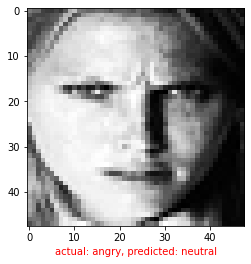

In [ ]:
  index = 0
  testImg = test_images[index]
  testImg = np.expand_dims(testImg, axis=0)
  pred = model.predict(testImg)
  eindex = np.argmax(pred)
  predEmot = class_names[eindex]
  actualEmot = class_names[test_labels[index]]
  imagePreview(testImg, actualEmot, predEmot)

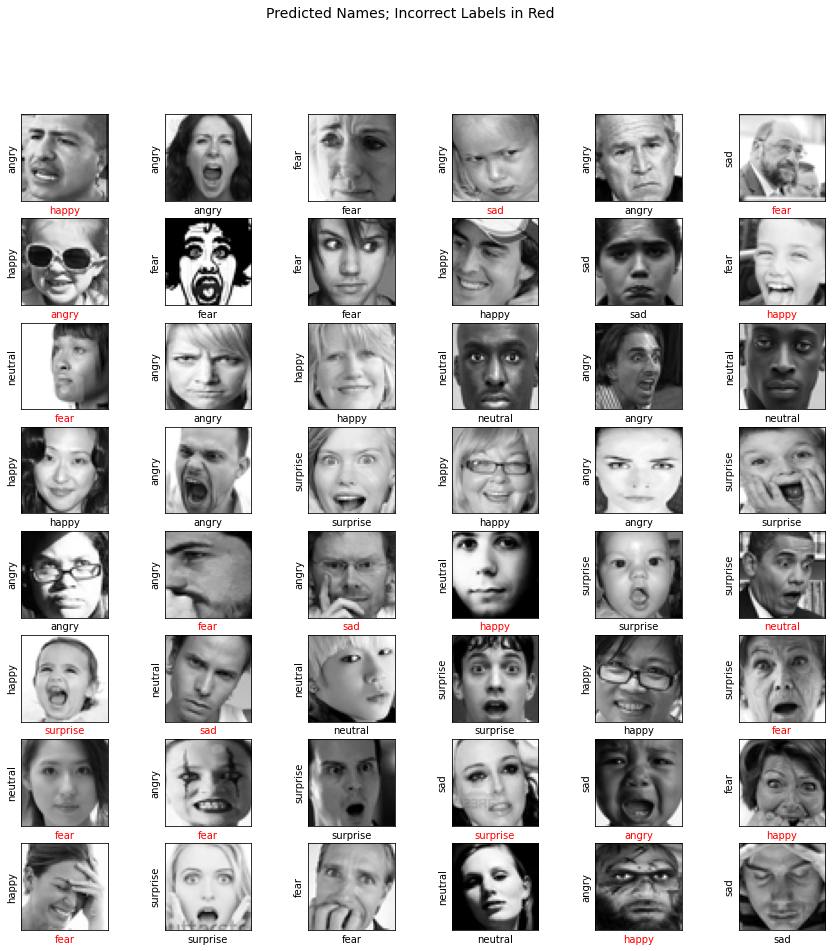

In [ ]:
fig, ax = plt.subplots(8, 6,figsize=(15,15))

for index, axi in enumerate(ax.flat):
    index = index + 50
    testImg = test_images[index]
    testImg = np.expand_dims(testImg, axis=0)

    axi.imshow(testImg.reshape(48, 48), cmap='gray')
    axi.set(xticks=[], yticks=[])
    
    pred = model.predict(testImg)
    eindex = np.argmax(pred)
    prediction = class_names[eindex]
    actual = class_names[test_labels[index]]

    axi.set_ylabel(actual, color='black')
    axi.set_xlabel(prediction, color='black' if prediction == actual else 'red')

    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
mbimg = np.array([])

In [ ]:
mbimg.shape

(0,)

In [ ]:
from PIL import Image
im = Image.open("mb_happy.jpg") 
px = im.load()

In [ ]:
"""from matplotlib import image
rgbImg = image.imread('mb_happy.jpg')"""
from skimage import color
from skimage import io

gsImg = color.rgb2gray(io.imread('rikka_surprised.jpg'))

In [ ]:
gsImg

array([[0.4916898 , 0.48915216, 0.46030235, ..., 0.28467294, 0.4241749 ,
        0.48185961],
       [0.48299843, 0.47598863, 0.44853765, ..., 0.28075137, 0.38327765,
        0.47847373],
       [0.48075137, 0.4264149 , 0.45973686, ..., 0.29278392, 0.33394902,
        0.4723051 ],
       ...,
       [0.56344863, 0.36654392, 0.15616314, ..., 0.47049451, 0.51610902,
        0.50345059],
       [0.70403686, 0.35727216, 0.1962051 , ..., 0.47746667, 0.50656157,
        0.46925765],
       [0.77348627, 0.35698941, 0.23542863, ..., 0.47968392, 0.46956314,
        0.44572824]])

In [ ]:
gsImg.shape

(48, 48)

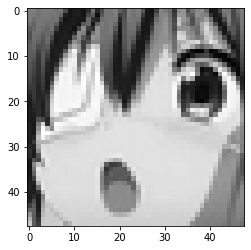

In [ ]:
plt.imshow(gsImg.reshape(48,48), cmap="gray")

In [ ]:
emotion

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
def imagePreview(image, actual = None , predicted = None):
  plt.figure()
  plt.imshow(image.reshape(48,48), cmap="gray")
  plt.xlabel("actual: "+actual + ", predicted: "+predicted, color='black' if predicted == actual else 'red')
  plt.show()

In [ ]:
def emotionPredict(imgDat, actual):
    testImg = imgDat.reshape((1,48,48,1))
    pred = model.predict(testImg)
    eindex = np.argmax(pred)
    prediction = class_names[eindex]
    #actual = class_names[test_labels[index]]
    imagePreview(testImg, actual, prediction)

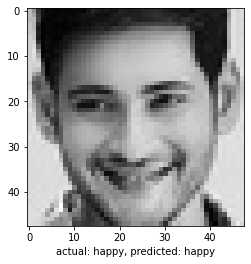

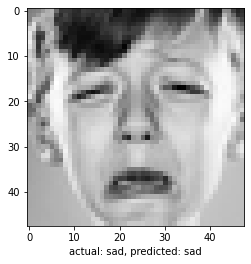

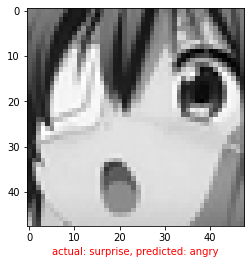

In [ ]:
ownData = [('mb_happy.jpg', 'happy'), ('crying_kid_color.jpg', 'sad'), ('rikka_surprised.jpg', 'surprise')]
for file, actualEmotion in ownData:
  gsImg = color.rgb2gray(io.imread(file))
  emotionPredict(gsImg, actualEmotion)

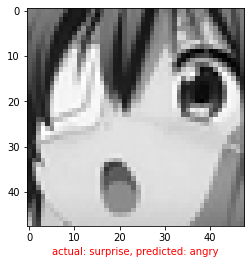

[[4.886998  0.        1.4088947 0.        0.        0.        0.       ]]


In [ ]:
from skimage import color
from skimage import io

gsImg = color.rgb2gray(io.imread('rikka_surprised.jpg'))
emotionPredict(gsImg, actualEmotion)

gsImg = gsImg.reshape((1,48,48,1))
pred = model.predict(testImg)
print(pred)
prediction = class_names[eindex]

#est = {}
#for key,value in freq.items():
#  est[emotion[key]] = value
#est

In [ ]:
from skimage import color
from skimage import io

emotion = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

gsImg = color.rgb2gray(io.imread('mb_happy.jpg'))

gsImg = gsImg.reshape((1,48,48,1))
pred = new_model.predict(gsImg)
print(pred)
prediction = emotion[eindex]


In [ ]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(a, bins = [0, 25, 50, 75, 100]) 
  
# Show plot 
plt.show() 

(35887,)

In [ ]:
all_labels = pd.DataFrame()
all_labels['label'] = y

In [ ]:
price = (all_labels['label']).value_counts()
price

3    9196
6    7198
4    6847
0    6807
2    5730
5    5260
1     767
Name: label, dtype: int64

In [ ]:
price = (data_df['emotion']).value_counts()
price

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
freq = price.to_dict()
freq

{0: 6807, 1: 767, 2: 5730, 3: 9196, 4: 6847, 5: 5260, 6: 7198}

In [ ]:
histoData = {}
for key,value in freq.items():
  histoData[emotion[key]] = value
histoData

{'angry': 6807,
 'disgust': 767,
 'fear': 5730,
 'happy': 9196,
 'neutral': 7198,
 'sad': 6847,
 'surprise': 5260}

<BarContainer object of 7 artists>

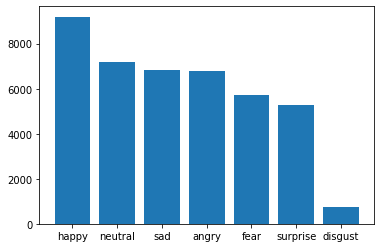

In [ ]:
plt.bar(histoData.keys(), histoData.values())

For new data

In [ ]:
labs_df = pd.DataFrame()

In [ ]:
labs_df['emotion'] = y

In [ ]:
price = (labs_df['emotion']).value_counts()
price

3    9196
6    7198
4    6847
0    6807
2    5730
5    5260
1     767
Name: emotion, dtype: int64

In [ ]:
freq = price.to_dict()
freq

{0: 6807, 1: 767, 2: 5730, 3: 9196, 4: 6847, 5: 5260, 6: 7198}

In [ ]:
new_emotion = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
freq = {0: 6807, 1: 5730, 2: 9196, 3: 6847, 4: 5260, 5: 7198}

In [ ]:
histoData = {}
for key,value in freq.items():
  histoData[new_emotion[key]] = value
histoData

{'angry': 6807,
 'fear': 5730,
 'happy': 9196,
 'neutral': 7198,
 'sad': 6847,
 'surprise': 5260}

<BarContainer object of 6 artists>

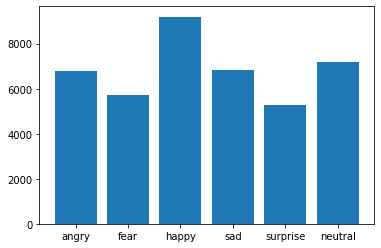

In [ ]:
plt.bar(histoData.keys(), histoData.values())

#Confusion matrix

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_labels.shape

(3589,)

In [ ]:
predictions.shape

(3589,)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=test_labels, y_pred=predictions)


Confusion matrix, without normalization


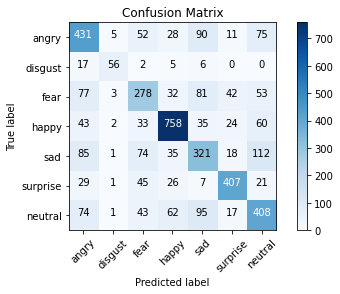

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = emotion
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


#Separator

In [ ]:
estimated = np.argmax(model.predict(train_images), axis = 1)

In [ ]:
estimated

array([3, 2, 4, ..., 4, 5, 4])

In [ ]:
train_labels

array([3, 2, 4, ..., 4, 0, 4])

In [ ]:
wrong = []
act = []
pre = []
correct = []
clabels = []

In [ ]:
for i in range(len(estimated)):
  if estimated[i] != train_labels[i]:
    wrong.append(train_images[i])
    pre.append(estimated[i])
    act.append(train_labels[i])
  else:
    correct.append(train_images[i])
    clabels.append(train_labels[i])

In [ ]:
len(wrong)
len(pre)
len(act)

787

In [ ]:
correct_data = pd.DataFrame()

In [ ]:
correct_data['image'] = correct

In [ ]:
correct_data['emotion'] = clabels

In [ ]:
correct_data

,image,emotion
0,"[[[0.054901960784313725], [0.09019607843137255...",3
1,"[[[0.32941176470588235], [0.3333333333333333],...",2
2,"[[[0.0], [0.0], [0.0], [0.0], [0.0039215686274...",4
3,"[[[0.8431372549019608], [0.8549019607843137], ...",2
4,"[[[0.29411764705882354], [0.3176470588235294],...",6
...,...,...
31506,"[[[0.3411764705882353], [0.403921568627451], [...",6
31507,"[[[0.8392156862745098], [0.796078431372549], [...",2
31508,"[[[0.27058823529411763], [0.3058823529411765],...",4
31509,"[[[0.3803921568627451], [0.36470588235294116],...",4


(3589,)

In [ ]:
np.array(correct).shape

(31511, 48, 48, 1)

In [ ]:
test_loss, test_acc = model.evaluate(np.array(correct),  np.array(clabels), verbose=2)
print(test_acc)

985/985 - 6s - loss: 0.0262 - accuracy: 1.0000
1.0


In [ ]:
correct_data.to_pickle("./compressed1.zip", compression='zip')


In [ ]:
unpickled_df = pd.read_pickle("./compressed1.zip")

(48, 48, 1)

In [ ]:
wrong_data = pd.DataFrame()

In [ ]:
wrong_data['image'] = wrong

In [ ]:
wrong_data['predicted'] = pre

In [ ]:
wrong_data['actual'] = act

In [ ]:
wrong_data

,image,predicted,actual
0,"[[[0.2], [0.4588235294117647], [0.843137254901...",4,3
1,"[[[0.396078431372549], [0.3333333333333333], [...",6,4
2,"[[[0.07058823529411765], [0.07058823529411765]...",4,2
3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5
4,"[[[0.1411764705882353], [0.11764705882352941],...",2,0
...,...,...,...
782,"[[[0.7450980392156863], [0.615686274509804], [...",6,0
783,"[[[0.6588235294117647], [0.6588235294117647], ...",6,0
784,"[[[0.11764705882352941], [0.5137254901960784],...",4,6
785,"[[[0.803921568627451], [0.8156862745098039], [...",4,6


In [ ]:
correct_data

,image,emotion
0,"[[[0.054901960784313725], [0.09019607843137255...",3
1,"[[[0.32941176470588235], [0.3333333333333333],...",2
2,"[[[0.0], [0.0], [0.0], [0.0], [0.0039215686274...",4
3,"[[[0.8431372549019608], [0.8549019607843137], ...",2
4,"[[[0.29411764705882354], [0.3176470588235294],...",6
...,...,...
31506,"[[[0.3411764705882353], [0.403921568627451], [...",6
31507,"[[[0.8392156862745098], [0.796078431372549], [...",2
31508,"[[[0.27058823529411763], [0.3058823529411765],...",4
31509,"[[[0.3803921568627451], [0.36470588235294116],...",4


In [ ]:
wrong_data.to_pickle("./wrong1.zip", compression='zip')


In [ ]:
unpickled_df = pd.read_pickle("./wrong1.zip")

In [ ]:
unpickled_df

,image,predicted,actual
0,"[[[0.2], [0.4588235294117647], [0.843137254901...",4,3
1,"[[[0.396078431372549], [0.3333333333333333], [...",6,4
2,"[[[0.07058823529411765], [0.07058823529411765]...",4,2
3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5
4,"[[[0.1411764705882353], [0.11764705882352941],...",2,0
...,...,...,...
782,"[[[0.7450980392156863], [0.615686274509804], [...",6,0
783,"[[[0.6588235294117647], [0.6588235294117647], ...",6,0
784,"[[[0.11764705882352941], [0.5137254901960784],...",4,6
785,"[[[0.803921568627451], [0.8156862745098039], [...",4,6


###Save model

In [ ]:
model.save('my_model.h5')

In [ ]:
!ls -lah

total 209M
drwxr-xr-x 1 root root 4.0K Sep 25 15:45  .
drwxr-xr-x 1 root root 4.0K Sep 25 10:24  ..
drwxr-xr-x 1 root root 4.0K Sep 18 16:15  .config
-rw-r--r-- 1 root root 2.7K Sep 25 12:41  crying_kid_color.jpg
drwxr-xr-x 3 root root 4.0K Sep 25 10:31  dataset
-rw-r--r-- 1 root root 194M Sep 25 10:30  facial-expression.zip
-rw-r--r-- 1 root root   67 Sep 25 12:22 'kaggle (1).json'
-rw-r--r-- 1 root root   67 Sep 25 10:30  kaggle.json
-rw-r--r-- 1 root root 2.0K Sep 25 12:41  mb_happy.jpg
-rw-r--r-- 1 root root  16M Sep 25 15:45  my_model.h5
-rw-r--r-- 1 root root 2.8K Sep 25 12:41  rikka_surprised.jpg
drwxr-xr-x 1 root root 4.0K Sep 16 16:29  sample_data


#Removing Disgust


###Pre train work


In [ ]:
emotion

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
updated = pd.DataFrame()

In [ ]:
updated['image'] = X
updated['emotion'] = y

In [ ]:
INTERESTED_LABELS = [0, 2, 3, 4, 5, 6]

In [ ]:
updated = updated[updated.emotion.isin(INTERESTED_LABELS)]

In [ ]:
updated.shape

(41038, 2)

In [ ]:
img_array = updated.image.apply(lambda x: np.array(x.reshape(48, 48, 1).astype('float32')))
img_array = np.stack(img_array, axis=0)

In [ ]:
img_array.shape

(41038, 48, 48, 1)

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
img_labels = le.fit_transform(updated.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(41038, 6)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}


In [ ]:
img_labels = np.argmax(img_labels, axis = 1)

In [ ]:
X = img_array
y = img_labels

In [ ]:
X_new = X/255.

In [ ]:
y_new = y

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
img_labels = le.fit_transform(updated.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape
y_new = img_labels

In [ ]:
y_new

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
X_data

In [ ]:
"""X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
X_train = X_train / 255.
X_valid = X_valid / 255."""

((36934, 48, 48, 1), (4104, 48, 48, 1), (36934, 6), (4104, 6))

In [ ]:
y_new = img_labels
y_new

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y_new, test_size=0.1,
                                                random_state=42)

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = (Xtrain, ytrain), (Xtest, ytest)

##Fourth architecture

###Initial train 4.1

In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(64, (5, 5), input_shape=(48, 48, 1),activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6))
model.add(layers.Activation('relu'))



"""model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(7, activation="softmax"))"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=32, 
            epochs=40, 
            verbose=1, 
            validation_data=(test_images, test_labels))

Epoch 1/25
578/578 [==============================] - 22s 37ms/step - loss: 1.6332 - accuracy: 0.3409 - val_loss: 1.5654 - val_accuracy: 0.3774
Epoch 2/25
578/578 [==============================] - 21s 37ms/step - loss: 1.3036 - accuracy: 0.4985 - val_loss: 1.2720 - val_accuracy: 0.5095
Epoch 3/25
578/578 [==============================] - 21s 36ms/step - loss: 1.1058 - accuracy: 0.5813 - val_loss: 1.1634 - val_accuracy: 0.5602
Epoch 4/25
578/578 [==============================] - 21s 36ms/step - loss: 0.9715 - accuracy: 0.6368 - val_loss: 1.0499 - val_accuracy: 0.6055
Epoch 5/25
578/578 [==============================] - 21s 36ms/step - loss: 0.8574 - accuracy: 0.6823 - val_loss: 1.0423 - val_accuracy: 0.6092
Epoch 6/25
578/578 [==============================] - 21s 36ms/step - loss: 0.7289 - accuracy: 0.7367 - val_loss: 1.0162 - val_accuracy: 0.6367
Epoch 7/25
578/578 [==============================] - 21s 36ms/step - loss: 0.5967 - accuracy: 0.7870 - val_loss: 1.1083 - val_accuracy:

###Second train 4.2

In [ ]:
#softmax in last layer

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
            batch_size=32, 
            epochs=25, 
            verbose=1, 
            callbacks = callbacks,
            validation_data=(test_images, test_labels))

Epoch 1/25
1155/1155 [==============================] - 24s 21ms/step - loss: 1.6515 - accuracy: 0.3707 - val_loss: 1.6374 - val_accuracy: 0.3894
Epoch 2/25
1155/1155 [==============================] - 24s 21ms/step - loss: 1.5576 - accuracy: 0.4753 - val_loss: 1.5440 - val_accuracy: 0.4868
Epoch 3/25
1155/1155 [==============================] - 24s 21ms/step - loss: 1.5052 - accuracy: 0.5306 - val_loss: 1.5138 - val_accuracy: 0.5207
Epoch 4/25
1155/1155 [==============================] - 24s 20ms/step - loss: 1.4657 - accuracy: 0.5726 - val_loss: 1.5708 - val_accuracy: 0.4622
Epoch 5/25
1155/1155 [==============================] - 24s 21ms/step - loss: 1.4393 - accuracy: 0.6002 - val_loss: 1.4688 - val_accuracy: 0.5668
Epoch 6/25
1155/1155 [==============================] - 24s 21ms/step - loss: 1.4091 - accuracy: 0.6322 - val_loss: 1.4637 - val_accuracy: 0.5746
Epoch 7/25
1155/1155 [==============================] - 24s 20ms/step - loss: 1.3830 - accuracy: 0.6599 - val_loss: 1.4525 -

###Third train 4.3

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(train_images)
batch_size = 32 #batch size of 32 performs the best.
epochs = 200
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]



In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (5, 5), input_shape=(48, 48, 1),activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optims[1])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 128)     

In [ ]:
batch_size


32

In [ ]:
y_new

array([0, 0, 1, ..., 5, 5, 5])

In [ ]:
# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular. 
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data= (test_images, test_labels),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/50
1155/1154 [==============================] - 25s 21ms/step - loss: 1.7238 - accuracy: 0.2890 - val_loss: 1.6237 - val_accuracy: 0.3250
Epoch 2/50
1155/1154 [==============================] - 25s 21ms/step - loss: 1.4624 - accuracy: 0.4211 - val_loss: 1.2925 - val_accuracy: 0.4963
Epoch 3/50
1155/1154 [==============================] - 25s 21ms/step - loss: 1.2770 - accuracy: 0.5028 - val_loss: 1.2376 - val_accuracy: 0.5112
Epoch 4/50
1155/1154 [==============================] - 25s 22ms/step - loss: 1.1831 - accuracy: 0.5439 - val_loss: 1.0537 - val_accuracy: 0.5916
Epoch 5/50
1155/1154 [==============================] - 25s 22ms/step - loss: 1.1181 - accuracy: 0.5732 - val_loss: 1.0666 - val_accuracy: 0.5855
Epoch 6/50
1155/1154 [==============================] - 25s 22ms/step - loss: 1.0807 - accuracy: 0.5899 - val_loss: 0.9834 - val_accuracy: 0.6274
Epoch 7/50
1155/1154 [==============================] - 25s 22ms/step - loss: 1.0454 - accuracy: 0.6041 - val_loss: 0.9845 -

In [ ]:
# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular. 
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data= (test_images, test_labels),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)

In [ ]:
class_names

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
new_classes = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

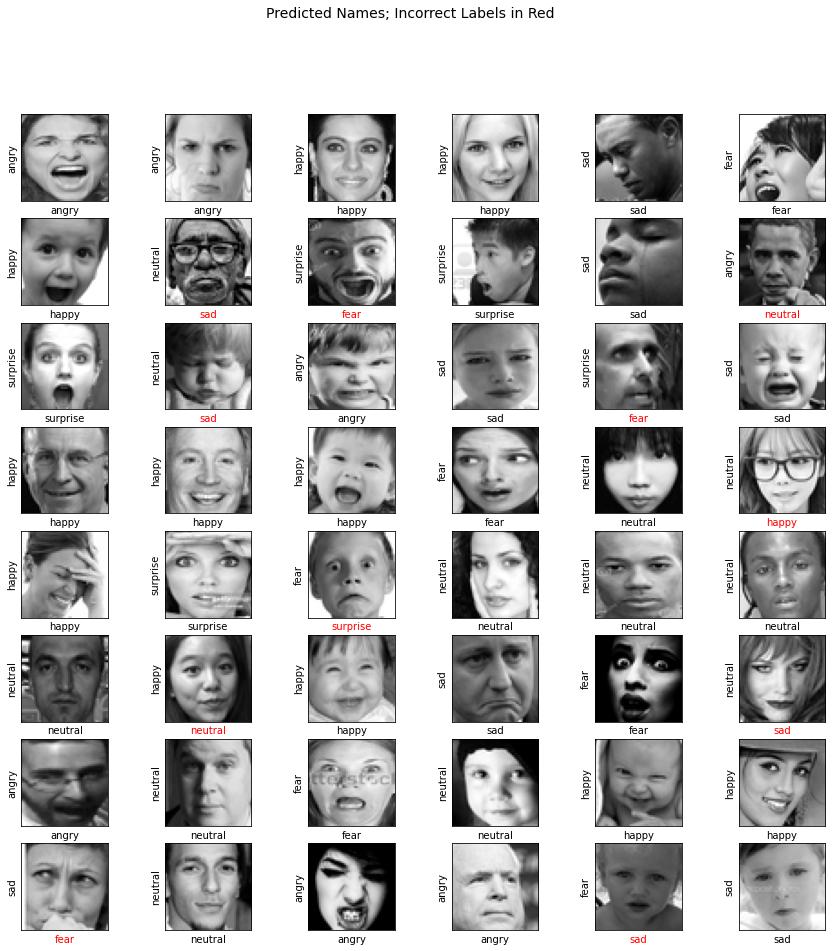

In [ ]:
fig, ax = plt.subplots(8, 6,figsize=(15,15))

for index, axi in enumerate(ax.flat):
    index = index
    testImg = test_images[index]
    testImg = np.expand_dims(testImg, axis=0)

    axi.imshow(testImg.reshape(48, 48), cmap='gray')
    axi.set(xticks=[], yticks=[])
    
    pred = model.predict(testImg)
    eindex = np.argmax(pred)
    prediction = new_classes[eindex]
    actual = new_classes[np.argmax(test_labels[index])]

    axi.set_ylabel(actual, color='black')
    axi.set_xlabel(prediction, color='black' if prediction == actual else 'red')

    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
model.save('my_model2.h5')

In [ ]:
model.predict((X_new[0].reshape(1, 48, 48, 1)))

array([[2.9383707e-01, 3.3638895e-01, 2.7160200e-05, 3.1594002e-01,
        3.3999667e-02, 1.9807132e-02]], dtype=float32)

In [ ]:
2.9383707e-01, 3.3638895e-01, 2.7160200e-05, 3.1594002e-01, 3.3999667e-02, 1.9807132e-02

(0.29383707, 0.33638895, 2.71602e-05, 0.31594002, 0.033999667, 0.019807132)

###Fourth train 4.4 (FINAL)

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [
    early_stopping,
    lr_scheduler,
    cp_callback,
]
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(train_images)
batch_size = 32 #batch size of 32 performs the best.
epochs = 200
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]



In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (5, 5), input_shape=(48, 48, 1),activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optims[1])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 128)      

In [ ]:
batch_size


32

In [ ]:
y_new

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular. 
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data= (test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/200
1155/1154 [==============================] - ETA: 0s - loss: 1.7693 - accuracy: 0.2592
Epoch 00001: saving model to ./cp.ckpt
1155/1154 [==============================] - 38s 33ms/step - loss: 1.7693 - accuracy: 0.2592 - val_loss: 1.6003 - val_accuracy: 0.3497
Epoch 2/200
1154/1154 [============================>.] - ETA: 0s - loss: 1.5072 - accuracy: 0.3997
Epoch 00002: saving model to ./cp.ckpt
1155/1154 [==============================] - 37s 32ms/step - loss: 1.5069 - accuracy: 0.3998 - val_loss: 1.3119 - val_accuracy: 0.4817
Epoch 3/200
1155/1154 [==============================] - ETA: 0s - loss: 1.3251 - accuracy: 0.4849
Epoch 00003: saving model to ./cp.ckpt
1155/1154 [==============================] - 37s 32ms/step - loss: 1.3251 - accuracy: 0.4849 - val_loss: 1.4457 - val_accuracy: 0.4505
Epoch 4/200
1154/1154 [============================>.] - ETA: 0s - loss: 1.2187 - accuracy: 0.5328
Epoch 00004: saving model to ./cp.ckpt
1155/1154 [==============================] 

In [ ]:
class_names

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
new_classes = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

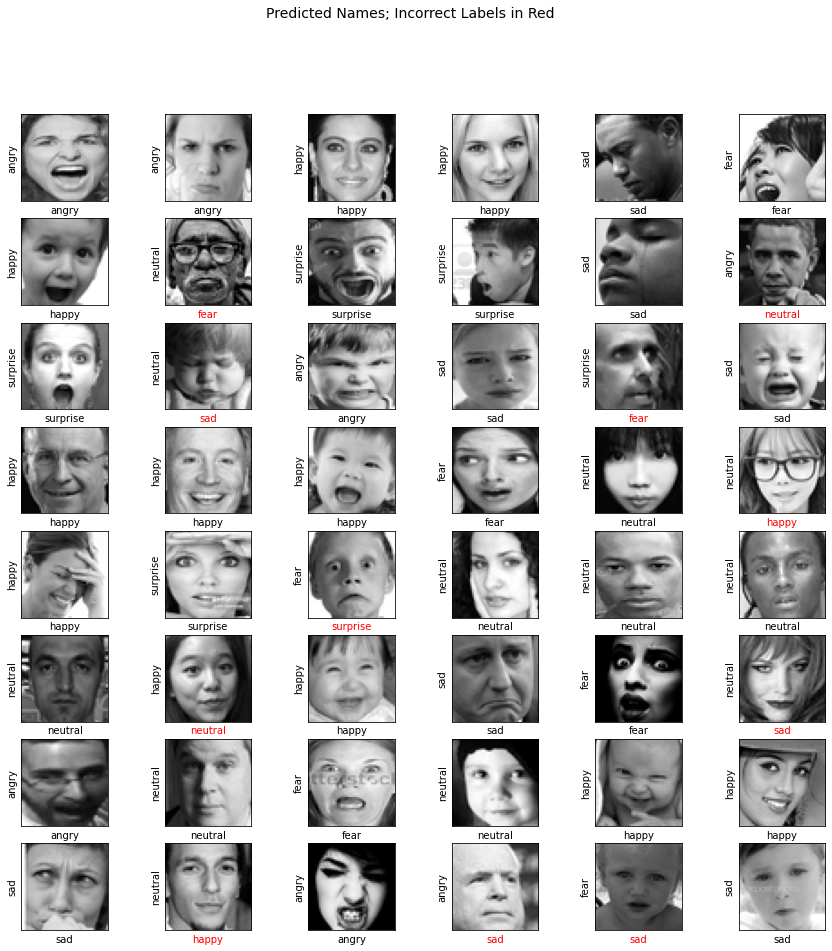

In [ ]:
fig, ax = plt.subplots(8, 6,figsize=(15,15))

for index, axi in enumerate(ax.flat):
    index = index
    testImg = test_images[index]
    testImg = np.expand_dims(testImg, axis=0)

    axi.imshow(testImg.reshape(48, 48), cmap='gray')
    axi.set(xticks=[], yticks=[])
    
    pred = model.predict(testImg)
    eindex = np.argmax(pred)
    prediction = new_classes[eindex]
    actual = new_classes[np.argmax(test_labels[index])]

    axi.set_ylabel(actual, color='black')
    axi.set_xlabel(prediction, color='black' if prediction == actual else 'red')

    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
model.save('my_model_final.h5')

In [ ]:
model.predict((X_new[0].reshape(1, 48, 48, 1)))

array([[2.9383707e-01, 3.3638895e-01, 2.7160200e-05, 3.1594002e-01,
        3.3999667e-02, 1.9807132e-02]], dtype=float32)

In [ ]:
2.9383707e-01, 3.3638895e-01, 2.7160200e-05, 3.1594002e-01, 3.3999667e-02, 1.9807132e-02

(0.29383707, 0.33638895, 2.71602e-05, 0.31594002, 0.033999667, 0.019807132)

###Confusion matrix for **final** model

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_labels.shape

(3589,)

In [ ]:
predictions.shape

(3589,)

In [ ]:
test_labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_predictions = model.predict(test_images)
test_preds = np.argmax(test_predictions, axis=1)
test_labs = np.argmax(test_labels, axis=1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=test_labs, y_pred=test_preds)


Confusion matrix, without normalization


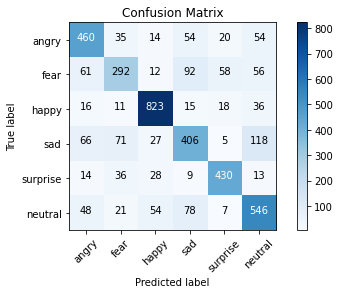

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = new_classes
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

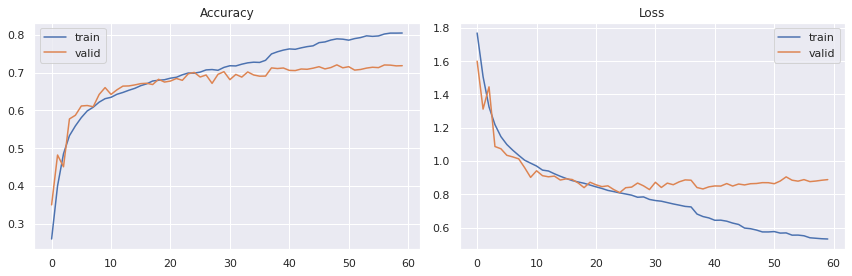

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

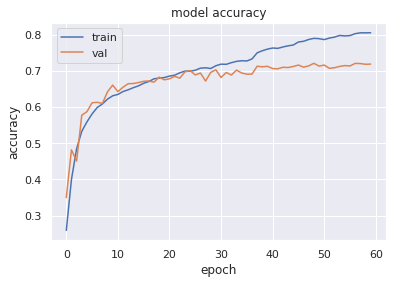

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

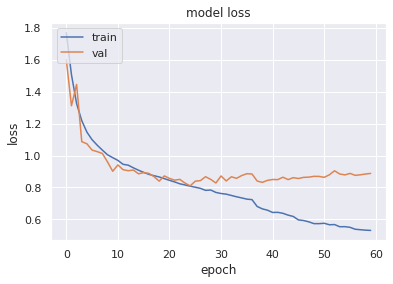

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Fifth architecture

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import os

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)
checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [
    early_stopping,
    lr_scheduler,
    cp_callback,
]
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(train_images)
batch_size = 32 #batch size of 32 performs the best.
epochs = 200
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]



In [ ]:
# Initialising the CNN
model = models.Sequential()

# 1 - Convolution
model.add(layers.Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 2nd Convolution layer
model.add(layers.Conv2D(128,(5,5), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 3rd Convolution layer
model.add(layers.Conv2D(512,(3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 4th Convolution layer
model.add(layers.Conv2D(512,(3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Flattening
model.add(layers.Flatten())

# Fully connected layer 1st layer
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

# Fully connected layer 2nd layer
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(6, activation='softmax'))

opt = optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optims[1])

#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_30 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_31 (Batc (None, 24, 24, 128)     

In [ ]:
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data= (test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/200
1155/1154 [==============================] - 32s 27ms/step - loss: 1.7770 - accuracy: 0.2739 - val_loss: 1.6816 - val_accuracy: 0.3406
Epoch 2/200
1155/1154 [==============================] - 31s 27ms/step - loss: 1.4824 - accuracy: 0.4108 - val_loss: 1.3290 - val_accuracy: 0.4620
Epoch 3/200
1155/1154 [==============================] - 31s 27ms/step - loss: 1.3338 - accuracy: 0.4728 - val_loss: 1.1689 - val_accuracy: 0.5431
Epoch 4/200
1155/1154 [==============================] - 31s 27ms/step - loss: 1.2699 - accuracy: 0.5046 - val_loss: 1.2312 - val_accuracy: 0.5185
Epoch 5/200
1155/1154 [==============================] - 32s 27ms/step - loss: 1.2177 - accuracy: 0.5281 - val_loss: 1.1747 - val_accuracy: 0.5478
Epoch 6/200
1155/1154 [==============================] - 31s 27ms/step - loss: 1.1847 - accuracy: 0.5436 - val_loss: 1.1334 - val_accuracy: 0.5733
Epoch 7/200
1155/1154 [==============================] - 31s 27ms/step - loss: 1.1559 - accuracy: 0.5539 - val_loss: 1

In [ ]:
model.save('my_model3.h5')

#Transfer Learning

##preprocessing

In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [ ]:
X.shape

(41038, 48, 48, 1)

In [ ]:
X_single = X.reshape(41038, 48, 48)

In [ ]:
rgb_batch = np.repeat(X_single[..., np.newaxis], 3, -1)


In [ ]:
rgb_batch.shape

(41038, 48, 48, 3)

In [ ]:
"""new_rgb = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(X_norm),
    name=None
)"""

In [ ]:
"""new_rgb = np.array(new_rgb)
new_rgb.shape"""

In [ ]:
#X_rgb = new_rgb

In [ ]:
X_rgb = rgb_batch

In [ ]:
y_new

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
IMG_SIZE = 48
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

##training

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               )

In [ ]:
IMG_SHAPE

(48, 48, 3)

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = keras.layers.Dense(6, activation='softmax')

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,
          validation_data=(test_images, test_labels),
          epochs=20,
          verbose=1,
          batch_size=32
)

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_rgb, y_new, test_size=0.1,
                                                random_state=42)

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = (Xtrain, ytrain), (Xtest, ytest)

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(train_images)

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
from keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

train_datagen.fit(train_images)
batch_size = 32 #batch size of 32 performs the best.
epochs = 50
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optims[1])

In [ ]:
batch_size=32
epochs=200
history = model.fit(
          train_datagen.flow(train_images, train_labels, batch_size=batch_size),
          validation_data=(test_images, test_labels),
          steps_per_epoch=len(test_images) / batch_size,
          epochs=epochs,
          #batch_size=32,
          callbacks=callbacks
)



Epoch 1/200
129/128 [==============================] - 6s 49ms/step - loss: 9.5550 - accuracy: 0.2265 - val_loss: 9.0252 - val_accuracy: 0.2342
Epoch 2/200
129/128 [==============================] - 6s 48ms/step - loss: 5.7707 - accuracy: 0.2582 - val_loss: 6.8980 - val_accuracy: 0.2590
Epoch 3/200
129/128 [==============================] - 6s 48ms/step - loss: 4.5282 - accuracy: 0.2682 - val_loss: 5.4441 - val_accuracy: 0.2717
Epoch 4/200
129/128 [==============================] - 6s 49ms/step - loss: 3.5025 - accuracy: 0.2907 - val_loss: 4.5635 - val_accuracy: 0.2795
Epoch 5/200
129/128 [==============================] - 6s 49ms/step - loss: 3.0110 - accuracy: 0.2975 - val_loss: 4.0619 - val_accuracy: 0.2856
Epoch 6/200
129/128 [==============================] - 6s 48ms/step - loss: 2.6089 - accuracy: 0.3040 - val_loss: 3.3875 - val_accuracy: 0.2978
Epoch 7/200
129/128 [==============================] - 6s 48ms/step - loss: 2.2763 - accuracy: 0.3234 - val_loss: 2.8954 - val_accuracy:

#Model metrics


In [ ]:
!pip install scikit-plot

total wrong validation predictions: 1147


              precision    recall  f1-score   support

           0       0.69      0.72      0.71       637
           1       0.63      0.51      0.56       571
           2       0.86      0.90      0.88       919
           3       0.62      0.59      0.60       693
           4       0.80      0.81      0.81       530
           5       0.66      0.72      0.69       754

    accuracy                           0.72      4104
   macro avg       0.71      0.71      0.71      4104
weighted avg       0.72      0.72      0.72      4104



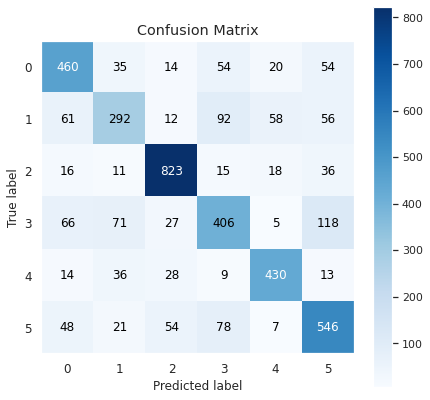

In [ ]:
import scikitplot
from sklearn.metrics import classification_report
yhat_valid = model.predict_classes(test_images)
scikitplot.metrics.plot_confusion_matrix(np.argmax(test_labels, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(test_labels, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(test_labels, axis=1), yhat_valid))


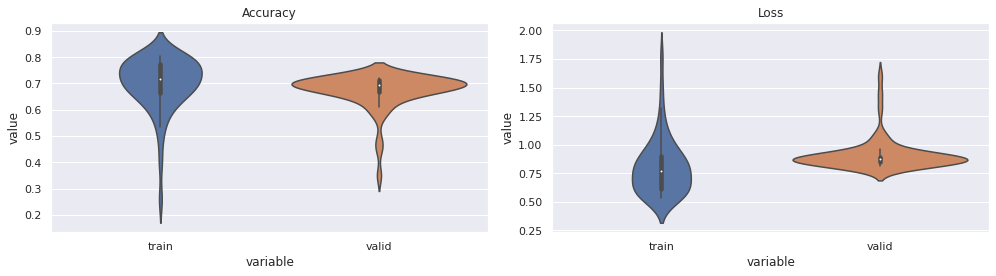

In [ ]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()